# Spatiala och temporala processer

Här är två visualiserade exempel.

1.  **Temporal tidsserie**: En simulerad aktiekurs genererad med
    **geometrisk brownsk rörelse** (Geometric Brownian Motion), vilket
    är en standardmodell för aktiepriser. Kurvan visar hur priset
    utvecklas över 252 handelsdagar.

2.  **Spatial Poissonprocess**: Slumpmässigt genererade punkter i ett
    10×10 område, där antalet punkter följer en Poissonfördelning med
    intensitet λ = 5 per areaenhet. Punkternas positioner är oberoende
    och likformigt fördelade, vilket är karakteristiskt för en homogen
    spatial Poissonprocess.

Båda exemplen illustrerar grundläggande stokastiska processer inom sina
respektive domäner – tid respektive rum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Aktiekurser

Den kontinuerliga processen $S_t$ (stock price) i vektorn `price`.
Notera att processen har en lognormal fördelning och att $\log S_t$ är
$\log S_0$ plus en wienerprocess.

In [ ]:
# 1. Temporal Time Series (e.g., Simulated Stock Price using Geometric Brownian Motion)
T = 252  # Number of trading days in a year
mu = 0.0002  # Daily drift
sigma = 0.01  # Daily volatility
S0 = 100  # Initial price

# Generate the time series
t = np.arange(T)
# Generate random returns
returns = np.random.normal(loc=mu, scale=sigma, size=T) # Diskret-tid vitt brus
# Pris
price = S0 * np.exp(np.cumsum(returns))

## Den spatiala poissonprocessen.

En poisson punktprocess i en rektangel kan representeras med två
vektorer `x_points` och `y_points` som båda är samplade från den
likformiga fördelningen. Längden på vektorerna (antalet punkter i
rektangeln) är poissonfördelat.

In [ ]:

# 2. Spatial Poisson Process
# Define the region [0, 10] x [0, 10]
x_min, x_max = 0, 10
y_min, y_max = 0, 10
area = (x_max - x_min) * (y_max - y_min)
lambda_intensity = 5  # Average number of points per unit area

En homogen poissonprocess kan genereras på följande sätt: 1. Generera
antalet punkter i en area. 2. Generera punkterna likformigt i arean.

In [ ]:

N = np.random.poisson(lambda_intensity * area)  # Total number of points

# Punkternas fördelning givet antalet punkter är likformigt
x_points = np.random.uniform(x_min, x_max, N)
y_points = np.random.uniform(y_min, y_max, N)

## Plotta båda processerna.

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temporal Time Series Plot
axes[0].plot(t, price, color='blue')
axes[0].set_title('Temporal Time Series: Simulated Stock Price')
axes[0].set_xlabel('Time (Days)')
axes[0].set_ylabel('Price')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Spatial Poisson Process Plot
axes[1].scatter(x_points, y_points, color='red', alpha=0.7)
axes[1].set_title('Spatial Poisson Process')
axes[1].set_xlabel('X Coordinate')
axes[1].set_ylabel('Y Coordinate')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


## Uppgift: Poissonprocess i en cirkel
Skapa en homogen poissonprocess som genererar punkter i en cirkel. Kom
ihåg att antal punkter i cirkeln skall vara poissonfördelat med
parameter $\lambda\times\text{Area}$. Generera punkter i en omgivande
kvadrat och filtrera bort de som inte ligger i cirkeln.

- Använd paketet
  [`pandas`](https://www.geeksforgeeks.org/pandas/ways-to-filter-pandas-dataframe-by-column-values/)
  för att representera $(x,y)$-koordinaterna och filtrera bort de som
  inte ligger i cirkeln.

- Plotta den underliggande cirkeln som bakgrund

``` python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
```


# Ornstein–Uhlenbeck-processen (OU-processen)

OU-processen $\{X_t\}_{t \geq 0}$ är en **stationär gaussisk
Markovprocess** som löser stokastiska differentialekvationen (SDE):

$$\begin{equation*}
dX_t = -\theta X_t \, dt + \sigma \, dW_t,
\end{equation*}$$

där:

- $\theta > 0$ är **medelåtervändningshastigheten**,
- $\sigma > 0$ är **volatiliteten**,
- $W_t$ är en **Wienerprocess** (Brownian motion).

Lösningen med initialvärde $X_0 = x_0$ är:

$$\begin{equation*}
X_t = x_0 e^{-\theta t} + \sigma \int_0^t e^{-\theta (t-s)} \, dW_s.
\end{equation*}$$

------------------------------------------------------------------------

## Varför är OU-processen en Markovprocess?

Processen är **Markov** eftersom:

- Den är en **lösning till en SDE med drift och diffusionskoefficient
  som endast beror på nuvarande tillstånd** $X_t$ (inte på historiken).

- Från lösningen ovan: villkoret på framtiden $X_{t+s}$ givet
  $\mathcal{F}_t
     = \sigma(X_u, u \leq t)$ beror **endast på $X_t$**, eftersom
  Wienerinkrementet $W_{t+s} - W_t$ är oberoende av $\mathcal{F}_t$.

Formellt gäller

$$\begin{equation*}
\mathsf{P}(X_{t+s} \in A \mid \mathcal{F}_t) = \mathbb{P}(X_{t+s} \in A \mid X_t).
\end{equation*}$$

Dessutom är övergångsfördelningen **normal**

$$\begin{equation*}
\mathsf P(X_{t+s} \mid X_t = x) =
\mathcal{N}\left( x e^{-\theta s}, \; \frac{\sigma^2}{2\theta} (1 - e^{-2\theta s}) \right).
\end{equation*}$$

------------------------------------------------------------------------

## Tidsdiskret approximation av OU → AR(1)-process

Använd *eulermetoden* med steglängd $\Delta t$:

$$\begin{equation*}
X_{t+\Delta t} \approx X_t - \theta X_t \Delta t + \sigma (W_{t+\Delta t} - W_t).
\end{equation*}$$

Låt $X_n = X_{n \Delta t}$ och

$$\begin{equation*}
\eta_n = \sigma(W_{n\Delta t} - W_{(n-1)\Delta t}) \sim \mathcal{N}(0, \sigma\Delta t).
\end{equation*}$$

Vilket ger en **AR(1)-process**:

$$\begin{equation*}
X_n = (1 - \theta \Delta t) X_{n-1} + \sigma \varepsilon_n = \phi X_{n-1} + \eta_n,
\end{equation*}$$

där $\phi = 1 - \theta \Delta t$ måste uppfylla $|\phi| < 1$ för
stationaritet skall gälla. Notera att detta $\implies$ att
$\theta > 0$).

------------------------------------------------------------------------

# Uppgift: Simulering och plottning av OU-processen

## Uppgift: Simulera OU processen

Följande kod simulerar två OU-processer med olika parametrar och plottar
dem:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fyll i här. 
def simulate_ou(theta, sigma, x0, T, dt):
    """
    Simulerar Ornstein-Uhlenbeck-processen med Eulersteg.

    theta, sigma: parametrar för OU-processen
    x0: Startpunkt
    T: Tiden [0,T]
    dt: tidssteg för "kontinuerlig" tid

    return t, X
    där t: tidsaxel och X: process
    """
    return None

In [ ]:
# Parametrar
T = 10.0
dt = 0.01
x0 = 0.0

# Process 1: Låg medelåtervändning, hög volatilitet (långsam, "rörig")
theta1, sigma1 = 0.3, 1.0
# Process 2: Hög medelåtervändning, låg volatilitet (snabb, "trång")
theta2, sigma2 = 2.0, 0.3

# Simulera
np.random.seed(42)  # För reproducerbarhet
t1, X1 = simulate_ou(theta1, sigma1, x0, T, dt)
t2, X2 = simulate_ou(theta2, sigma2, x0, T, dt)

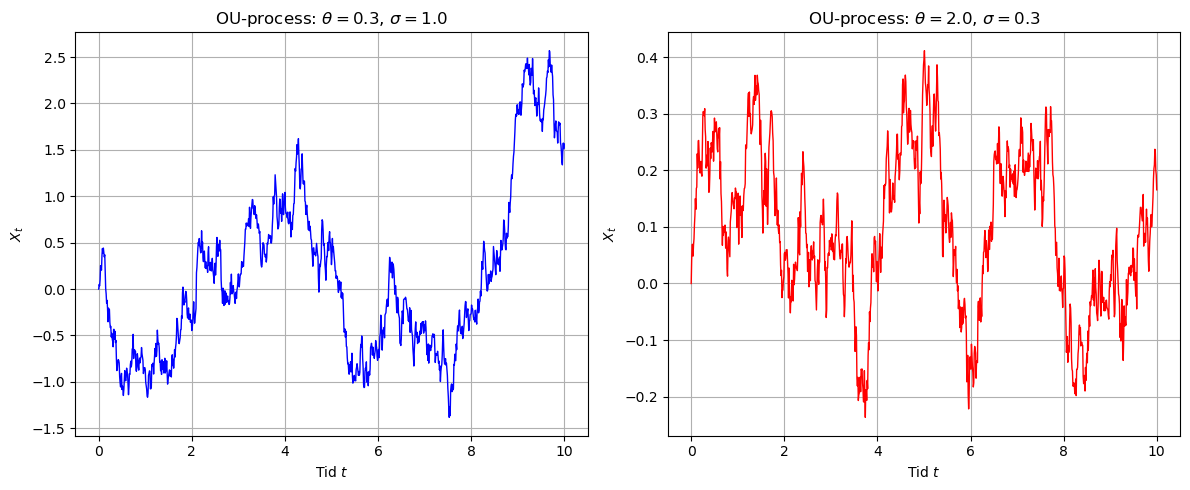

In [1]:
# Plotta
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t1, X1, 'b-', linewidth=1)
plt.title(f'OU-process: $\\theta={theta1}$, $\\sigma={sigma1}$')
plt.xlabel('Tid $t$')
plt.ylabel('$X_t$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t2, X2, 'r-', linewidth=1)
plt.title(f'OU-process: $\\theta={theta2}$, $\\sigma={sigma2}$')
plt.xlabel('Tid $t$')
plt.ylabel('$X_t$')
plt.grid(True)

plt.tight_layout()
plt.show()

## Uppgift:

Fyll i rutinen `simulate_ou`. Kom ihåg att det slumpmässiga steget skall ha standardavvikelse $\sigma\sqrt{\Delta t}$. 

## **Tolkning av plottarna**

De två figurerna visar simuleringar av Ornstein–Uhlenbeck-processen med
olika parametrar:

- **Vänster figur** ($\theta = 0.3, \sigma = 1.0$):
  - **Låg medelåtervändningshastighet** ($\theta$ liten) → processen
    "dröjer" kvar långt från noll.
  - **Hög volatilitet** ($\sigma$ stor) → stora slumpmässiga störningar.
  - Resultat: En **långsam, rörig** kurva med stora avvikelser från
    noll.
- **Höger figur** ($\theta = 2.0, \sigma = 0.3$):
  - **Hög medelåtervändningshastighet** ($\theta$ stor) → processen dras
    snabbt tillbaka mot noll.
  - **Låg volatilitet** ($\sigma$ liten) → små slumpmässiga störningar.
  - Resultat: En **snabb, trång** realisering som håller sig nära noll.

Båda processerna är **stationära** och **Markovska**, men deras dynamik
skiljer sig markant beroende på parametrarna. Den stationära
standardavvikelsen är $\sqrt{\sigma^2/(2\theta)}$, vilket ger:

- Vänster: $\sqrt{1.0^2 / (2 \cdot 0.3)} \approx 1.29$,
- Höger: $\sqrt{0.3^2 / (2 \cdot 2.0)} \approx 0.15$,

vilket stämmer med plottarnas skalor.

# Stationär fördelning till OU

Eftersom **kontinuerliga** OU-processen är gaussisk och stationär, är
den stationära fördelningen en normalfördelning med

- **Medelvärde** $\mathbb{E}[X_t] = 0$ (ingen konstant drift),

- **Varians** Lös $\frac{d}{dt} \mathrm{Var}(X_t) = 0$. Från SDE

$$\begin{equation*}
    \frac{d}{dt} \mathbb{E}[X_t^2] = -2\theta \mathbb{E}[X_t^2] + \sigma^2.
    \end{equation*}$$

I stationaritet gäller $0 = -2\theta \mathrm{Var}(X) + \sigma^2$ dvs

$$\begin{equation*}
    \mathrm{Var}(X) = \frac{\sigma^2}{2\theta}.
    \end{equation*}$$

Alltså

$$\begin{equation*}
X_t \xrightarrow{d} \mathcal{N}\left(0, \frac{\sigma^2}{2\theta}\right) \quad \text{som } t \to \infty.
\end{equation*}$$

För den **diskreta AR(1)**-processen ges den stationära variansen av

$$\begin{equation*}
  \gamma_0 = \frac{\mathrm{Var}(\eta)}{1 - \phi^2} = \frac{\sigma^2 \Delta t}{1 - (1 - \theta \Delta t)^2} \approx \frac{\sigma^2}{2\theta}
\end{equation*}$$

för små $\Delta t$ vilket verkar stämma.

------------------------------------------------------------------------

## Uppgift: Åskådliggör den stationära fördelningen av OU-processen

Kopiera `simulate_ou` till en vektoriell form `ou_sample` som tar en
*vektor* `x0` av startvärden och returnerar motsvarande simulerade
sluttillstånd i en vektor `xn`.

Använd
[`plt.hist`](https://www.geeksforgeeks.org/data-visualization/plotting-histogram-in-python-using-matplotlib/)
för att åskådliggöra fördelningen av `xn` när vi startar i en vektor
`x0` av längd `M` som

1.  är en vektor av ett tillstånd `x0=c*ones(M)`
2.  är en vektor av längd `M` simulerad från den stationära fördelningen